**Social computing**

BSc in Data Science and Artificial Intelligence (10CD)

School of Computer Science - Universidad Politécnica de Madrid

2021/2022 - Semester 2

# Installation and imports

If needed, install [NetworkX](https://networkx.org/):

In [ ]:
!pip install networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Basic functions

## Creating a graph

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [2]:
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


## Adding nodes

Single nodes:

In [3]:
G.add_node('a')
print(G)

Graph with 1 nodes and 0 edges


From iterable object:

In [4]:
G.add_nodes_from(['b', 'c'])
print(G)

Graph with 3 nodes and 0 edges


In [5]:
G.nodes

NodeView(('a', 'b', 'c'))

From another graph:

In [6]:
H = nx.Graph()
H.add_node('z')
G.add_nodes_from(H)
print(G)
G.nodes

Graph with 4 nodes and 0 edges


NodeView(('a', 'b', 'c', 'z'))

**Caveat!** This is different from adding the graph H as a node of G:

In [7]:
G.add_node(H)
print(G)
G.nodes

Graph with 5 nodes and 0 edges


NodeView(('a', 'b', 'c', 'z', <networkx.classes.graph.Graph object at 0x7ff7e149cb50>))

You can delete nodes as follows:

In [8]:
print(G)
G.remove_node(H)
print(G)
G.nodes

Graph with 5 nodes and 0 edges
Graph with 4 nodes and 0 edges


NodeView(('a', 'b', 'c', 'z'))

You can delete all information of the graph with `clear`:

In [9]:
Gprime = G.copy()
Gprime.clear()
print(Gprime)

Graph with 0 nodes and 0 edges


You can also add node attributes using tuples of the form `(node, node_attribute_dict)`:

In [10]:
G.add_nodes_from([
    ('d', {'color': 'green'}),
    ('e', {'color': 'blue', 'my_attr': 3.14})
])
print(G)

Graph with 6 nodes and 0 edges


See the nodes as an attribute of the graph:

In [11]:
G.nodes

NodeView(('a', 'b', 'c', 'z', 'd', 'e'))

And the number of nodes in the graph:

In [12]:
G.number_of_nodes()

6

And the attributes of a certain node:

In [13]:
G.nodes['e']

{'color': 'blue', 'my_attr': 3.14}

## Connecting the nodes: edges

Add edges to the graph:

In [14]:
G.add_edge('a', 'b')
aux = ('a', 'c')
# If the edge comes as a tuple, it needs to be unpacked:
G.add_edge(*aux)
print(G)

Graph with 6 nodes and 2 edges


Multiple edges at once:

In [15]:
G.add_edges_from([('b', 'c'), ('c', 'd')])
print(G)

Graph with 6 nodes and 4 edges


From another graph:

In [16]:
H.add_node('y')
H.add_edge('y', 'z')
print(G.nodes)
G.add_edges_from(H.edges)
print(G)

['a', 'b', 'c', 'z', 'd', 'e']
Graph with 7 nodes and 5 edges


What happened with the nodes of G?

In [17]:
print(G.nodes)

['a', 'b', 'c', 'z', 'd', 'e', 'y']


In [18]:
'y' in G.nodes

True

You can delete edges as follows:

In [19]:
print(H)
H.remove_edge('y', 'z')
print(H)

Graph with 2 nodes and 1 edges
Graph with 2 nodes and 0 edges


You can also add edge attributes using tuples of the form `(edge, edge_attribute_dict)`:

In [20]:
G.add_edges_from([
    ('b', 'c', {'weight': 3.5}),
    ('c', 'd', {'weight': 2})
])
print(G)

Graph with 7 nodes and 5 edges


See the edges as an attribute of the graph:

In [21]:
G.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd'), ('z', 'y')])

And the number of edges in the graph:

In [22]:
G.number_of_edges()

5

Accessing attributes of an edge:

In [23]:
G.edges[('b', 'c')]

{'weight': 3.5}

**Exercise 1:** Build the complete graph of 7 nodes $K_7$ (name it differently from G and H).

In [24]:
n = 7
K_7 = nx.Graph()
K_7.add_nodes_from(list(range(7)))
K_7.add_edges_from([(i, j) for i in range(n) for j in range(n) if i != j])
print(K_7)

Graph with 7 nodes and 21 edges


# Drawing graphs

## Basic drawing

The basic command for drawing a graph in NetwokX is `draw`:

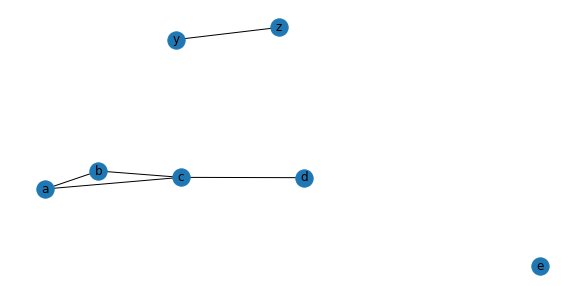

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
nx.draw(G, with_labels=True)
plt.show()

You can use different layouts:

In [26]:
nx.draw_shell?

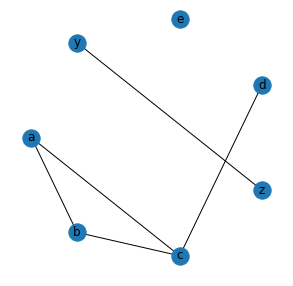

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
nx.draw_shell(G, with_labels=True)
plt.show()

In [28]:
nx.draw_circular?

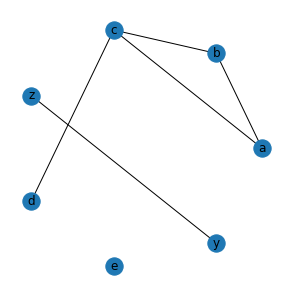

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
nx.draw_circular(G, with_labels=True)
plt.show()

You can modify all kind of visual aspects:

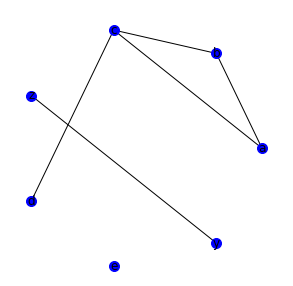

In [30]:
opts = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 1
}

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
nx.draw_circular(G, with_labels=True, **opts)
plt.show()

Save graph:

In [31]:
fig.savefig('data/G.png')

**Exercise 2:** Take the complete graph $K_7$ and draw it. Choose and modify:
  1. Node color.
  2. Node size.
  3. Node shape.
  4. Edge color.
  5. Edge style.
  6. Color transparency.
  7. Font color.
  8. Font weight.

Check [the docs](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for more information.

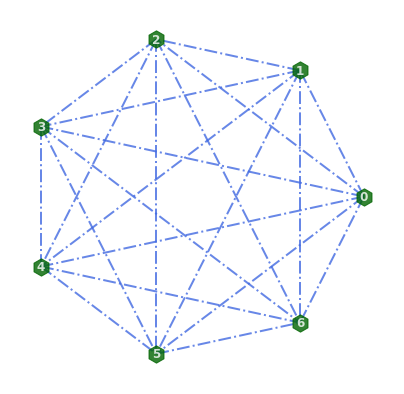

In [32]:
opts = {
    'node_color': 'darkgreen',
    'node_size': 300,
    'node_shape': 'h',
    'edge_color': 'royalblue',
    'width': 2,
    'alpha': 0.8,
    'style': '-.',
    'font_color': 'white',
    'font_weight': 'bold',
    'label': 'My graph'
}

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_circular(K_7, with_labels=True, **opts)
plt.show()

There are many ways to improve the appearance of a graph, see [this example](https://networkx.org/documentation/stable/auto_examples/drawing/plot_rainbow_coloring.html):

![K_13](https://networkx.org/documentation/stable/_images/sphx_glr_plot_rainbow_coloring_001.png)

## Existing graphs

Petersen graph:

![petersen](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Petersen_graph.svg/252px-Petersen_graph.svg.png)

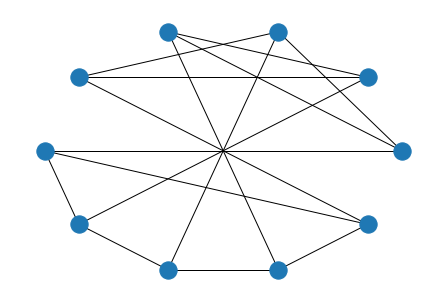

In [33]:
P = nx.petersen_graph()
nx.draw_shell(P)

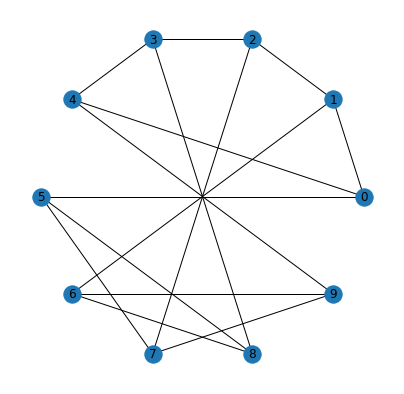

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_circular(P, with_labels=True)
plt.show()

Use the `nlist` keyword:

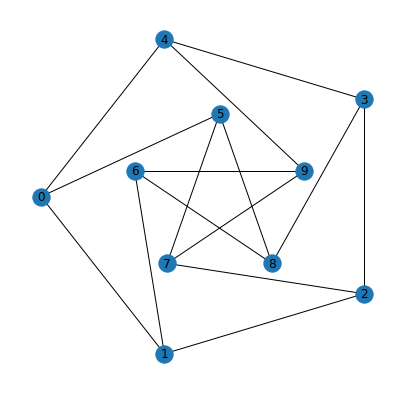

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_shell(P, with_labels=True, nlist=[range(5, 10), range(5)])
plt.show()

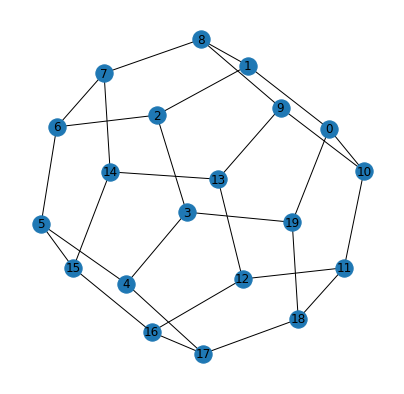

In [36]:
D = nx.dodecahedral_graph()

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

nx.draw(D, with_labels=True)
plt.show()

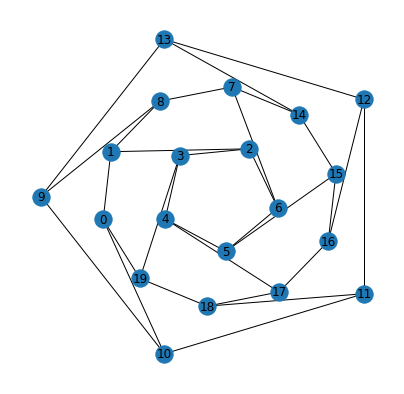

In [37]:
D = nx.dodecahedral_graph()

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(D, with_labels=True,  nlist=shells)
plt.show()

**Exercise 3:** Take the complete graph $K_7$ and draw it in two concentric circles.

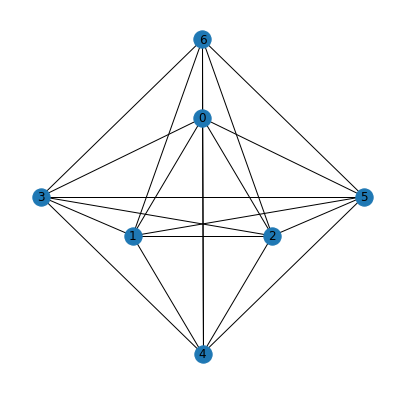

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
shells = [[0, 1, 2], [3, 4, 5, 6]]
nx.draw_shell(K_7, with_labels=True,  nlist=shells)
plt.show()

### And many more

Yes, you guessed it right, also complete graphs:

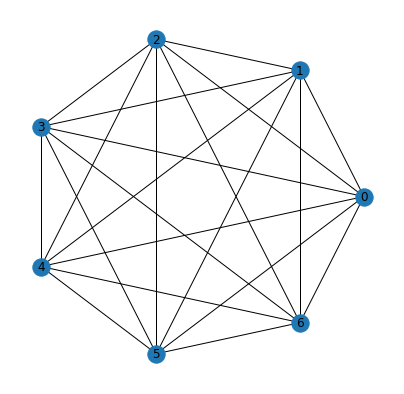

In [39]:
K_7prime = nx.complete_graph(7)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_circular(K_7prime, with_labels=True)
plt.show()

One step beyond:

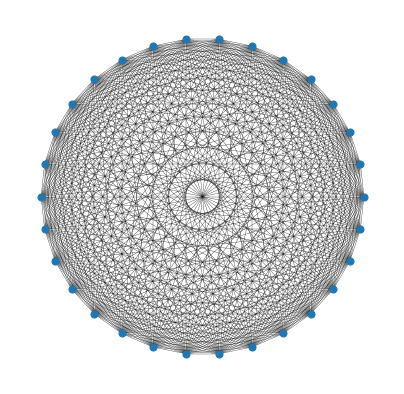

In [40]:
opts = {
    'node_size': 50,
    'width': 0.3
}

n = 30
K_30 = nx.complete_graph(n)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_circular(K_30, with_labels=False, **opts)
plt.show()

**Exercise 4**: Infer the number of edges of $K_n$ in general, based on $n$.

In [41]:
for n in range(1, 16):
    print('{} --> {}'.format(n, nx.complete_graph(n).number_of_edges()))

1 --> 0
2 --> 1
3 --> 3
4 --> 6
5 --> 10
6 --> 15
7 --> 21
8 --> 28
9 --> 36
10 --> 45
11 --> 55
12 --> 66
13 --> 78
14 --> 91
15 --> 105


$$|\text{edges }(K_n)| = \frac{n\cdot(n-1)}{2}$$

**Extra**: In general, the number of edges from an undirected graph can be obtained from the degree of each node:

$$2\cdot |\text{edges }(G)| = \sum_{v \in V}\text{deg}(v)$$

The known as [**handshaking lemma**](https://en.wikipedia.org/wiki/Handshaking_lemma) is a consequence of that formula: _the number of vertices that touch an odd number of edges is even._

Complete bipartite:

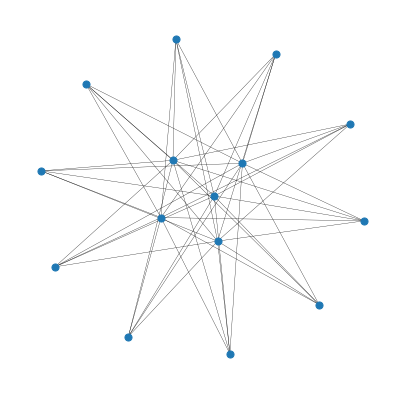

In [42]:
m, n = 5, 10
K_mn = nx.complete_bipartite_graph(m, n)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(K_mn, with_labels=False, **opts)
plt.show()

We can plot it in a more "classical" way as follows:

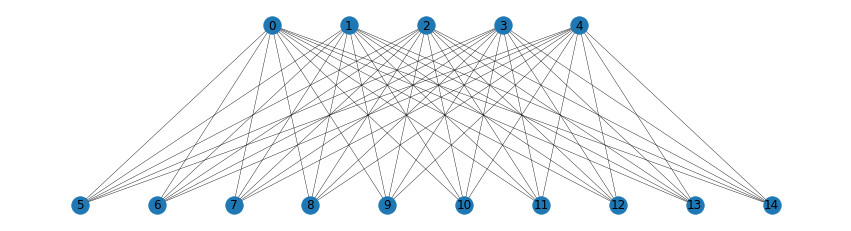

In [43]:
pos = {}
pos.update((i, (i - m/2, 1)) for i in range(m))
pos.update((i, (i - m - n/2, 0)) for i in range(m, m + n))

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
nx.draw(K_mn, with_labels=True, pos=pos, node_size=300, width=0.4)
plt.show()

Lollipop graph:

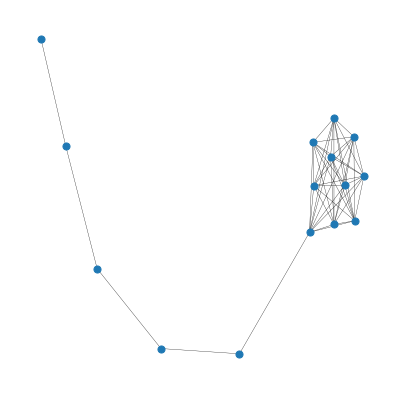

In [44]:
M = nx.lollipop_graph(10, 5)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(M, with_labels=False, **opts)
plt.show()

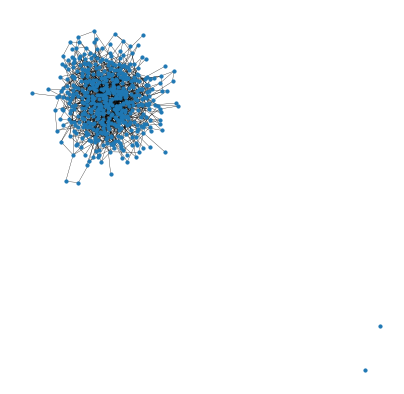

In [45]:
opts = {
    'node_size': 10,
    'width': 0.3
}

G1 = nx.erdos_renyi_graph(500, 0.01, 123, False)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(G1, with_labels=False, **opts)
plt.show()

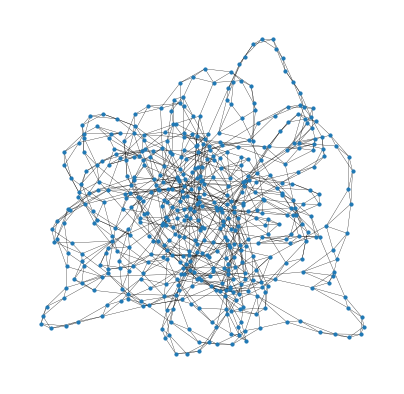

In [46]:
G2 = nx.newman_watts_strogatz_graph(500, 4, 0.1, 123) 

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(G2, with_labels=False, **opts)
plt.show()

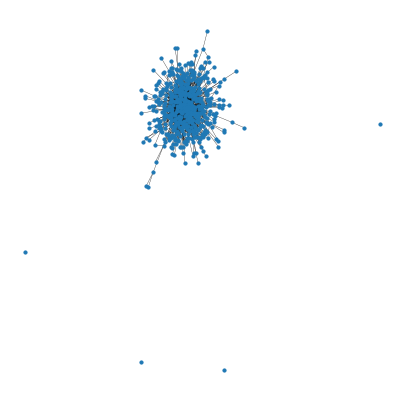

In [47]:
G3 = nx.extended_barabasi_albert_graph(500, 1, 0.5, 0.1, 123) 

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(G3, with_labels=False, **opts)
plt.show()

# Analyzing graphs

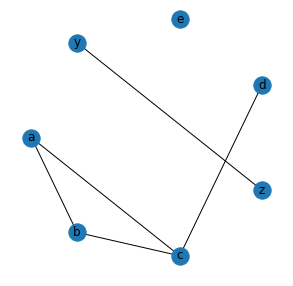

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
nx.draw_shell(G, with_labels=True)
plt.show()

## Basic operations

**Connected components** (largest first):

In [49]:
list(nx.connected_components(G))

[{'a', 'b', 'c', 'd'}, {'y', 'z'}, {'e'}]

Check the **degree** of a/every node:

In [50]:
G.degree('a')

2

In [51]:
sorted((n, d) for n, d in G.degree())

[('a', 2), ('b', 2), ('c', 3), ('d', 1), ('e', 0), ('y', 1), ('z', 1)]

Find **cycles**:

In [52]:
nx.algorithms.find_cycle(G)

[('a', 'b'), ('b', 'c'), ('c', 'a')]

Compute **shortest paths**:

In [53]:
list(nx.shortest_path(G, 'a', 'd'))

['a', 'c', 'd']

In [54]:
list(nx.all_shortest_paths(G, 'a', 'd'))

[['a', 'c', 'd']]

In [55]:
dict(nx.all_pairs_shortest_path(G))

{'a': {'a': ['a'], 'b': ['a', 'b'], 'c': ['a', 'c'], 'd': ['a', 'c', 'd']},
 'b': {'b': ['b'], 'a': ['b', 'a'], 'c': ['b', 'c'], 'd': ['b', 'c', 'd']},
 'c': {'c': ['c'], 'a': ['c', 'a'], 'b': ['c', 'b'], 'd': ['c', 'd']},
 'z': {'z': ['z'], 'y': ['z', 'y']},
 'd': {'d': ['d'],
  'c': ['d', 'c'],
  'a': ['d', 'c', 'a'],
  'b': ['d', 'c', 'b']},
 'e': {'e': ['e']},
 'y': {'y': ['y'], 'z': ['y', 'z']}}

In [56]:
dict(nx.all_pairs_shortest_path_length(G))

{'a': {'a': 0, 'b': 1, 'c': 1, 'd': 2},
 'b': {'b': 0, 'a': 1, 'c': 1, 'd': 2},
 'c': {'c': 0, 'a': 1, 'd': 1, 'b': 1},
 'z': {'z': 0, 'y': 1},
 'd': {'d': 0, 'c': 1, 'a': 2, 'b': 2},
 'e': {'e': 0},
 'y': {'y': 0, 'z': 1}}

## Centrality

Lets define a new graph:

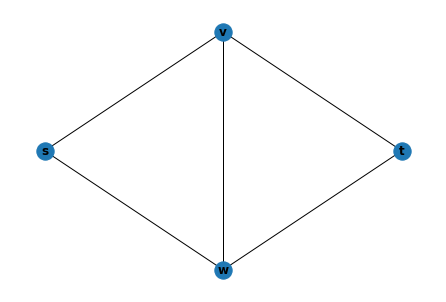

In [57]:
H = nx.Graph()
H.add_nodes_from(['t', 'v', 's', 'w'])
H.add_edges_from([('s', 'v'), ('s', 'w'), ('v', 't'), ('w', 't'), ('v', 'w')])
nx.draw_circular(H, with_labels=True, font_weight='bold')

The **degree centrality** for a node $v$ is the fraction of nodes it is connected to:

$$D_c\,(v) = \frac{|\text{neighbors}\,(v)|}{n-1}$$

- $D_c\,(v) = 3 / 3 = 1$
- $D_c\,(w) = 3 / 3 = 1$
- $D_c\,(s) = 2 / 3$
- $D_c\,(t) = 2 / 3$

In [58]:
nx.degree_centrality(H)

{'t': 0.6666666666666666, 'v': 1.0, 's': 0.6666666666666666, 'w': 1.0}

The **clustering coefficient** of a node $v$ is the fraction of possible triangles through that node that exist:

$$C_{\text{coeff}}\,(v) = \frac{T(v)}{\frac{\text{deg}(v)(\text{deg}(v) - 1)}{2}} = \frac{2\cdot T(v)}{\text{deg}(v)(\text{deg}(v) - 1)}$$

H has 4 nodes, so the maximum number of triangles is . Betweenness of H:
- $C_{\text{coeff}}\,(v) = 2\, /\, 3$
- $C_{\text{coeff}}\,(w) = 2\, /\, 3$
- $C_{\text{coeff}}\,(s) = 1\, /\, 1 = 1$
- $C_{\text{coeff}}\,(t) = 1\, /\, 1 = 1$

In [59]:
print(nx.average_clustering(H))
nx.clustering(H)

0.8333333333333333


{'t': 1.0, 'v': 0.6666666666666666, 's': 1.0, 'w': 0.6666666666666666}

You can calculate $T(v)$ with:

In [60]:
nx.triangles(H)

{'t': 1, 'v': 2, 's': 1, 'w': 2}

The **betweenness centrality** of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$:

$$B_c\,(v) = \sum_{s, t \in V} \frac{\sigma(s, t | v)}{\sigma(s, t)}$$

Usually, the betweennes is rescaled by $\frac{(n-1)(n-2)}{2}$ for undirected graphs and by $(n-1)(n-2)$ for directed ones.

H has 4 nodes, so the rescaling factor is 3. Betweenness of H:
- $B_c\,(v) = (1/2 + 0 + 0)\, /\, 3 = 1/6$
- $B_c\,(w) = (1/2 + 0 + 0)\, /\, 3 = 1/6$
- $B_c\,(s) = (0 + 0 + 0)\, /\, 3 = 0$
- $B_c\,(t) = (0 + 0 + 0)\, /\, 3 = 0$

In [61]:
nx.betweenness_centrality??

In [62]:
nx.betweenness_centrality(H)

{'t': 0.0, 'v': 0.16666666666666666, 's': 0.0, 'w': 0.16666666666666666}

The **closeness centrality** of a node $v$ is the reciprocal of the average shortest path distance to $v$ over all $n-1$ reachable nodes:

$$C_c\,(v) = \frac{n-1}{\sum_{u \in V} \min\,\text{d}(u, v)}$$

Closeness of H:
- $C_c\,(v) = 3\, /\, (1 + 1 + 1) = 1$
- $C_c\,(w) = 3\, /\, (1 + 1 + 1) = 1$
- $C_c\,(s) = 3\, /\, (1 + 1 + 2) = 3/4$
- $C_c\,(t) = 3\, /\, (1 + 1 + 2) = 3/4$

In [63]:
nx.closeness_centrality(H)

{'t': 0.75, 'v': 1.0, 's': 0.75, 'w': 1.0}

**Exercise 5**: For the complete graph $K_n$, calculate for every node:
- the degree centrality,
- the clustering coefficient,
- the betweenness centrality, and
- the closeness centrality.

Consider the complete graph $K_n$:
- $D_c\, (v) = 1$, for all $v\in V$.
- $C_{\text{coeff}}\, (v) = 1$, for all $v\in V$.
- $B_c\, (v) = 0$, for all $v\in V$.
- $C_c\, (v) = 1$, for all $v\in V$.

**Caveat!** If the graph is a multigraph, directed, weighted, etc., these metrics can be defined slightly differently.

## Coloring

Ever heard about the [**four color theorem**](https://en.wikipedia.org/wiki/Four_color_theorem)?

_No more than four colors are required to color the regions of any map so that no two adjacent regions have the same color._

The smallest number of colors needed to color a graph $G$ is called its **chromatic number** $\chi(G)$.

In [64]:
colors_d = {0: 'red', 1: 'orange', 2: 'green', 3: 'blue'}
colors_d

{0: 'red', 1: 'orange', 2: 'green', 3: 'blue'}

There are several algorithms to assign colors to nodes:

{'v': 0, 'w': 1, 't': 2, 's': 2}


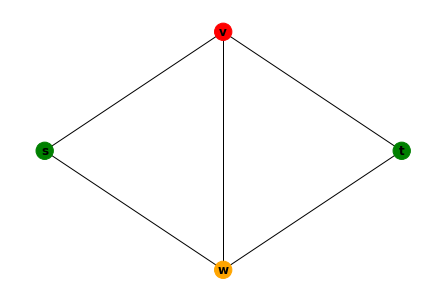

In [65]:
greedy = nx.coloring.greedy_color(H)
print(greedy)
colors = [colors_d[greedy[node]] for node in H.nodes()]
nx.draw_circular(H, node_color=colors, with_labels=True, font_weight='bold')

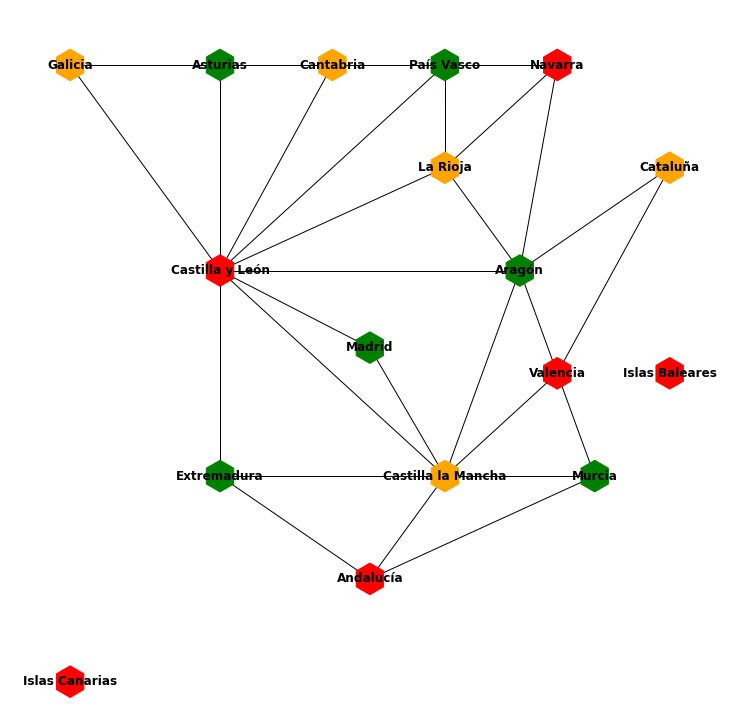

In [66]:
spain = nx.Graph()
spain.add_nodes_from(['Madrid', 'Castilla y León', 'Extremadura', 'Castilla la Mancha',
                      'Aragón', 'La Rioja', 'Cantabria', 'Asturias', 'Galicia', 
                      'Islas Canarias', 'Andalucía', 'Murcia', 'Valencia', 'Islas Baleares',
                      'Cataluña', 'Navarra', 'País Vasco'])
spain.add_edges_from([('Madrid', 'Castilla y León'),
                      ('Madrid', 'Castilla la Mancha'),
                      ('Castilla y León', 'Extremadura'),
                      ('Castilla y León', 'Castilla la Mancha'),
                      ('Castilla y León', 'Aragón'),
                      ('Castilla y León', 'La Rioja'),
                      ('Castilla y León', 'País Vasco'),
                      ('Castilla y León', 'Cantabria'),
                      ('Castilla y León', 'Asturias'),
                      ('Castilla y León', 'Galicia'),
                      ('Galicia', 'Asturias'),
                      ('Cantabria', 'Asturias'),
                      ('Extremadura', 'Castilla la Mancha'),
                      ('Extremadura', 'Andalucía'),
                      ('Castilla la Mancha', 'Andalucía'),
                      ('Castilla la Mancha', 'Murcia'),
                      ('Castilla la Mancha', 'Valencia'),
                      ('Castilla la Mancha', 'Aragón'),
                      ('Andalucía', 'Murcia'),
                      ('Valencia', 'Aragón'),
                      ('Valencia', 'Murcia'),
                      ('Aragón', 'Cataluña'),
                      ('Valencia', 'Cataluña'),
                      ('Aragón', 'Navarra'),
                      ('Navarra', 'País Vasco'),
                      ('Aragón', 'Navarra'),
                      ('País Vasco', 'Cantabria'),
                      ('La Rioja', 'Navarra'),
                      ('La Rioja', 'País Vasco'),
                      ('La Rioja', 'Aragón'),
                      #('Castilla y León', 'Navarra'),
                      #('Extremadura', 'Madrid'),
                     ])
coordinates = [(0, 0.25), (-1, 1), (-1, -1), (0.5, -1), (1, 1),
               (0.5, 2), (-0.25, 3), (-1, 3), (-2, 3), (-2, -3),
               (0, -2), (1.5, -1), (1.25, 0), (2, 0), (2, 2), (1.25, 3), (0.5, 3)]
pos = dict(zip(spain.nodes, coordinates))

greedy = nx.coloring.greedy_color(spain)
colors = [colors_d[greedy[node]] for node in spain.nodes()]

fig, ax = plt.subplots()
fig.set_size_inches(13, 13)
nx.draw(spain, with_labels=True, node_color=colors,
        node_shape='h', node_size=1000, font_weight='bold', pos=pos)

![spain](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Autonomous_communities_of_Spain_no_names.svg/500px-Autonomous_communities_of_Spain_no_names.svg.png)

**Exercise 6**: For the graph of Spanish communities, calculate for every node:
- the degree centrality,
- the clustering coefficient,
- the betweenness centrality, and
- the closeness centrality.

Also, check that the handshaking lemma holds.

In [67]:
nx.degree_centrality(spain)

{'Madrid': 0.125,
 'Castilla y León': 0.5625,
 'Extremadura': 0.1875,
 'Castilla la Mancha': 0.4375,
 'Aragón': 0.375,
 'La Rioja': 0.25,
 'Cantabria': 0.1875,
 'Asturias': 0.1875,
 'Galicia': 0.125,
 'Islas Canarias': 0.0,
 'Andalucía': 0.1875,
 'Murcia': 0.1875,
 'Valencia': 0.25,
 'Islas Baleares': 0.0,
 'Cataluña': 0.125,
 'Navarra': 0.1875,
 'País Vasco': 0.25}

In [68]:
nx.clustering(spain)

{'Madrid': 1.0,
 'Castilla y León': 0.2222222222222222,
 'Extremadura': 0.6666666666666666,
 'Castilla la Mancha': 0.3333333333333333,
 'Aragón': 0.3333333333333333,
 'La Rioja': 0.6666666666666666,
 'Cantabria': 0.6666666666666666,
 'Asturias': 0.6666666666666666,
 'Galicia': 1.0,
 'Islas Canarias': 0,
 'Andalucía': 0.6666666666666666,
 'Murcia': 0.6666666666666666,
 'Valencia': 0.5,
 'Islas Baleares': 0,
 'Cataluña': 1.0,
 'Navarra': 0.6666666666666666,
 'País Vasco': 0.5}

In [69]:
nx.betweenness_centrality(spain)

{'Madrid': 0.0,
 'Castilla y León': 0.3631944444444445,
 'Extremadura': 0.023611111111111107,
 'Castilla la Mancha': 0.1923611111111111,
 'Aragón': 0.16944444444444443,
 'La Rioja': 0.019444444444444445,
 'Cantabria': 0.00625,
 'Asturias': 0.004166666666666667,
 'Galicia': 0.0,
 'Islas Canarias': 0.0,
 'Andalucía': 0.004166666666666667,
 'Murcia': 0.006944444444444444,
 'Valencia': 0.03472222222222222,
 'Islas Baleares': 0.0,
 'Cataluña': 0.0,
 'Navarra': 0.007638888888888888,
 'País Vasco': 0.026388888888888892}

In [70]:
nx.closeness_centrality(spain)

{'Madrid': 0.4375,
 'Castilla y León': 0.6447368421052632,
 'Extremadura': 0.45370370370370366,
 'Castilla la Mancha': 0.5833333333333333,
 'Aragón': 0.5568181818181818,
 'La Rioja': 0.47115384615384615,
 'Cantabria': 0.4224137931034483,
 'Asturias': 0.4083333333333333,
 'Galicia': 0.3951612903225806,
 'Islas Canarias': 0.0,
 'Andalucía': 0.3828125,
 'Murcia': 0.3951612903225806,
 'Valencia': 0.4375,
 'Islas Baleares': 0.0,
 'Cataluña': 0.3712121212121212,
 'Navarra': 0.3951612903225806,
 'País Vasco': 0.4375}

In [71]:
sum(dict(spain.degree).values()) == 2 * len(spain.edges)

True

# Read and write a graph

Check [the docs](https://networkx.org/documentation/stable/reference/readwrite/index.html).

Export to adjacency list:

In [72]:
nx.write_adjlist(K_7, 'data/K_7.adjlist')

Read the same graph:

In [73]:
print(nx.read_adjlist('data/K_7.adjlist'))

Graph with 7 nodes and 21 edges


**Exercise 7:** Take the graph of Spanish communities, and:
  1. Export it to GEXF format.
  2. Open Gephi and load it.
  3. Modify anything of the loaded graph.
  4. Export it back to a new GEXF.
  5. Try to read that modified graph in NetworkX. What happens?

Export to gexf list:

In [74]:
nx.write_gexf(spain, 'data/spain.gexf')

Read the exported graph by Gephi:

In [75]:
print(nx.read_gexf('data/spain_gephi.gexf'))

NetworkXError: No <graph> element in GEXF file.

This is likely to be due to the GEXF version: 1.2 vs 1.3. Open both files with a browser to verify it.

However, for GraphML format:

In [77]:
print(nx.read_graphml('data/spain_gephi.graphml'))

Graph with 17 nodes and 29 edges


# Final notes about NetworkX

Even if we did not cover it, you can also build:
  - [Directed graphs](https://networkx.org/documentation/stable/reference/classes/digraph.html#networkx.DiGraph)
  - [Multigraphs](https://networkx.org/documentation/stable/reference/classes/multigraph.html#networkx.MultiGraph)
  - [MultiDiGraphs](https://networkx.org/documentation/stable/reference/classes/multidigraph.html#networkx.MultiDiGraph)
  - etc.

Furthermore, you can perform operations such as:
  - union,
  - composition,
  - cartesian product,
  - convert to undirected,
  - and many more.

Finally, there are more [algorithms](https://networkx.org/documentation/stable/reference/algorithms/index.html) that can be applied to a graph:
  - travelling salesman,
  - find cliques,
  - etc.

# Moviegalaxies

1. Download the moviegalaxies dataset: https://dx.doi.org/10.7910/DVN/T4HBA3  
**Note**: If you are working in Collab, download the zip file manually, upload it to Collab, and unzip it with `!unzip file.zip`

2. Check the available movies:

In [78]:
import os
n_folder = './moviegalaxies/'
n_list = [f for f in os.listdir(n_folder) if os.path.isfile(os.path.join(n_folder, f)) and f.endswith('.gexf')]
print('{} movies loaded'.format(len(n_list)))

773 movies loaded


3. Get a list with the number of nodes per network:

In [79]:
numberOfNodes_list = []
for n in n_list:
    network = nx.read_gexf(n_folder + n)
    nodes = network.number_of_nodes()
    numberOfNodes_list.append(nodes)
print('Maximum number of characters in a movie: {}'.format(max(numberOfNodes_list)))

Maximum number of characters in a movie: 109


4. Plot a histogram of characters per movie:

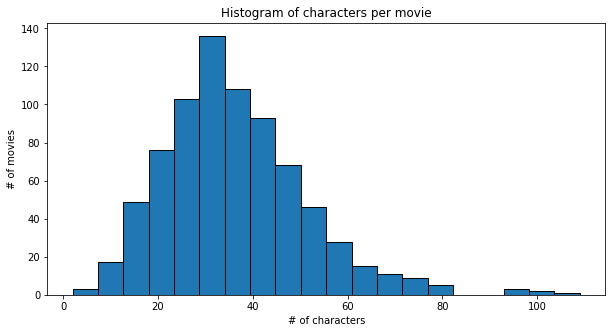

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.hist(numberOfNodes_list, bins=20, edgecolor='k')
ax.set_title('Histogram of characters per movie')
ax.set_xlabel('# of characters')
ax.set_ylabel('# of movies')
plt.show()

**Exercise 8:**
  1. Pick a movie from the list (see the `network_metadata.tab` file).
  2. Load it and explore it using NetworkX:
    - degree,
    - centrality,
    - clustering,
    - community detection,
    - etc.
  3. Now do it with Gephi.
  4. What can you deduce from these metrics?
  5. Repeat the analysis for a different movie and compare it.
  6. What differences do you see between using Gephi and NetworkX?

**Hint**: You can use the following function to rename the nodes to their actual label:

In [81]:
def rename_nodes(graph, attribute='label'):
    renamer = {}
    for node in graph.nodes:
        renamer[node] = movie.nodes[node][attribute]
    nx.relabel_nodes(graph, renamer, copy=False)

**Hint**: You can use this function to plot the movie graph using its included attributes for visualization:

In [82]:
def plot_graph(graph):
    color, size, pos = [], [], {}
    maxi, mini, a, b = 30, 5, 200, 5000 # for scaling the size
    for node in graph.nodes:
        rgba = list(graph.nodes[node]['viz']['color'].values()) 
        color.append((rgba[0] / 255, rgba[1] / 255, rgba[2] / 255, rgba[3]))
        size.append(a + (graph.nodes[node]['viz']['size'] - mini) * (b - a) / (maxi - mini))
        pos[node] = (graph.nodes[node]['viz']['position']['x'], graph.nodes[node]['viz']['position']['y'])

    fig, ax = plt.subplots()
    fig.set_size_inches(13, 13)
    nx.draw(movie, with_labels=True, font_weight='bold',
            node_size=size, pos=pos, node_color=color)

You can tune this function to change the color or size of the nodes based on centrality metrics, etc.

## Fight Club

Graph with 46 nodes and 94 edges


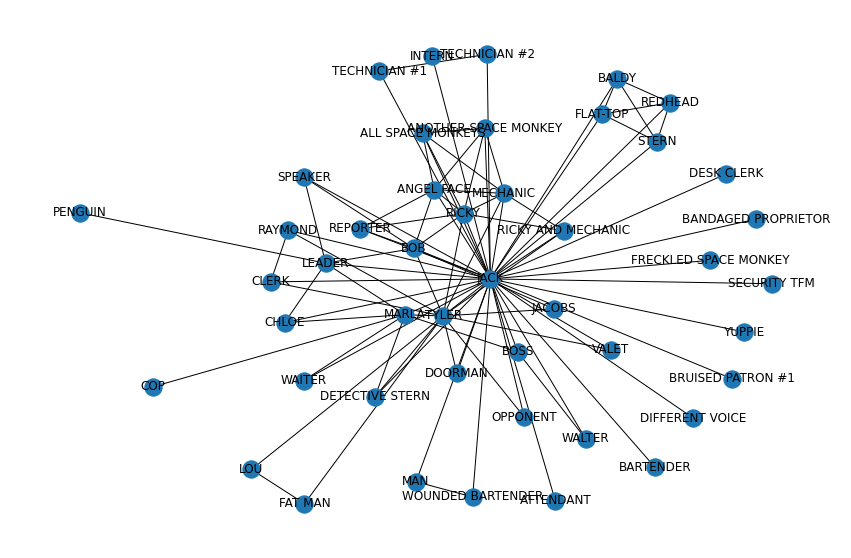

In [83]:
movie_id = 309
movie = nx.read_gexf('./moviegalaxies/{}.gexf'.format(movie_id))
print(movie)
rename_nodes(movie)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
nx.draw(movie, with_labels=True)

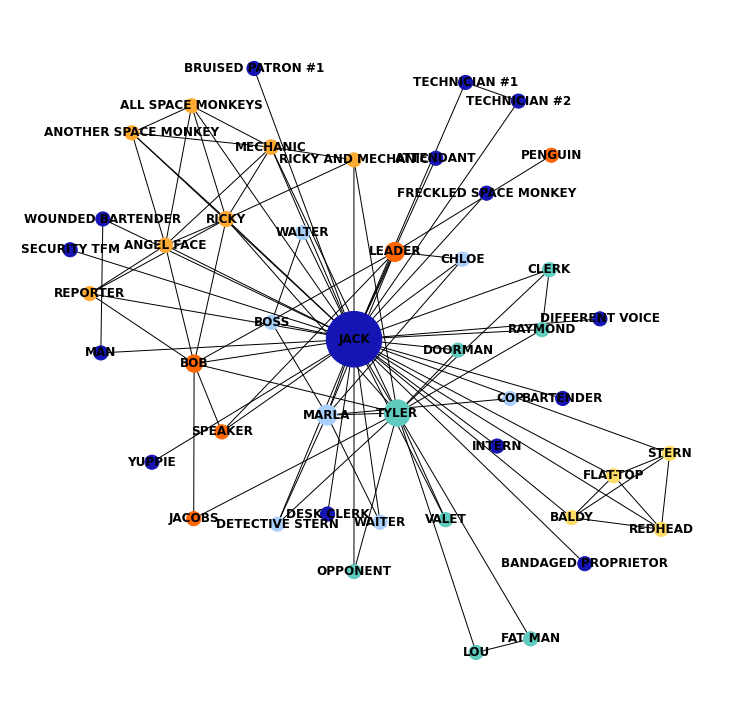

In [84]:
plot_graph(movie)

In [86]:
nx.degree_centrality(movie)['TYLER'], \
nx.clustering(movie)['TYLER'], \
nx.betweenness_centrality(movie)['TYLER'], \
nx.closeness_centrality(movie)['TYLER']

(0.33333333333333337,
 0.18095238095238095,
 0.13897306397306397,
 0.5921052631578947)

## The Matrix

In [87]:
movie_id = 543
movie = nx.read_gexf('./moviegalaxies/{}.gexf'.format(movie_id))
print(movie)
rename_nodes(movie)

Graph with 31 nodes and 88 edges


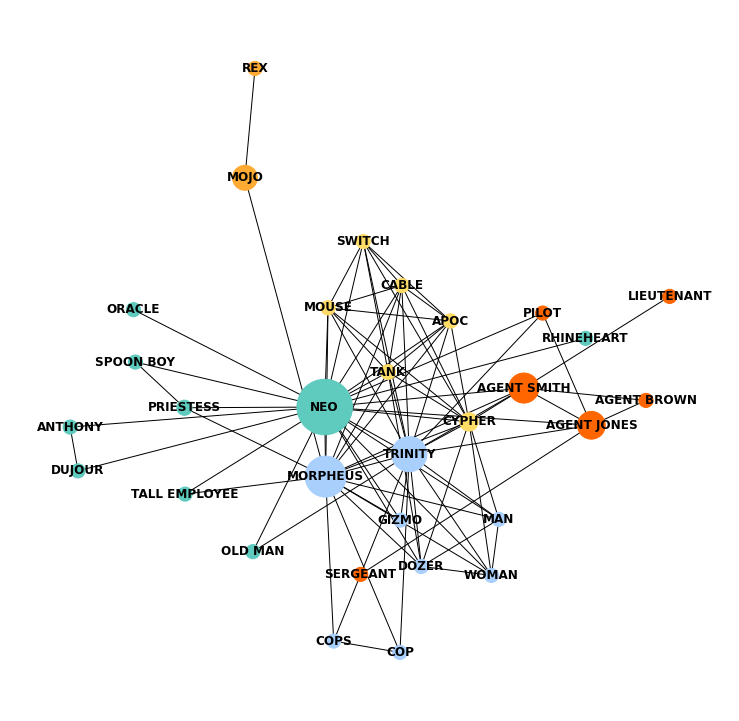

In [88]:
plot_graph(movie)

In [89]:
movie.edges[('NEO', 'AGENT SMITH')], movie.edges[('NEO', 'TRINITY')], movie.edges[('NEO', 'ORACLE')]

({'weight': 5.0, 'movie_id': 543, 'label': '119128'},
 {'weight': 10.0, 'movie_id': 543, 'label': '119134'},
 {'weight': 1.0, 'movie_id': 543, 'label': '119225'})

In [90]:
nx.degree_centrality(movie)['NEO'], \
nx.clustering(movie)['NEO'], \
nx.betweenness_centrality(movie)['NEO'], \
nx.closeness_centrality(movie)['NEO']

(0.7666666666666666,
 0.2134387351778656,
 0.4551231527093596,
 0.7894736842105263)

It seems like the betweenness was not rescaled:

In [91]:
movie.nodes['NEO']['Betweenness Centrality']

197.97857142857137

In [92]:
n = movie.number_of_nodes()
nx.betweenness_centrality(movie)['NEO'] * (n - 1)*(n - 2) / 2

197.97857142857143

## Snatch

In [93]:
movie_id = 751
movie = nx.read_gexf('./moviegalaxies/{}.gexf'.format(movie_id))
print(movie)
rename_nodes(movie)

Graph with 35 nodes and 133 edges


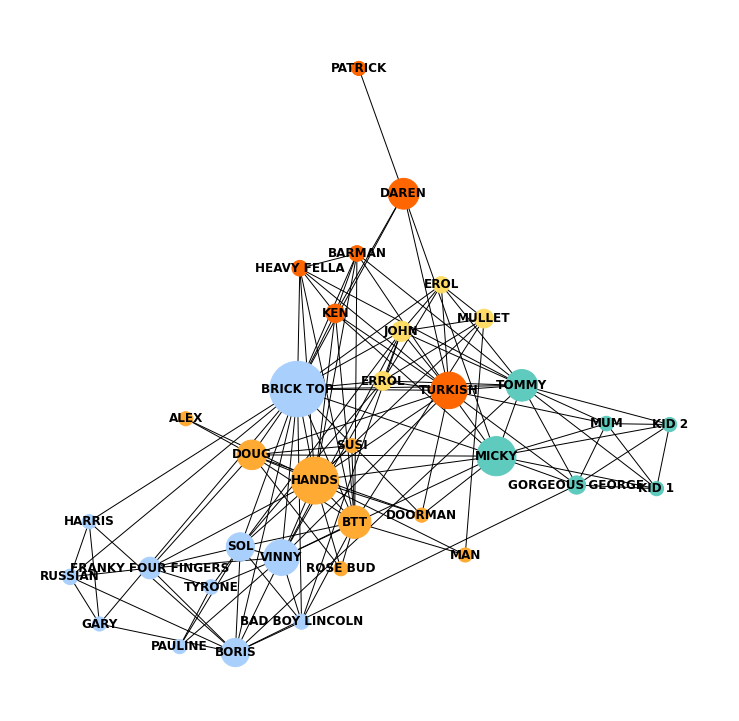

In [94]:
plot_graph(movie)

In [95]:
nx.degree_centrality(movie)['MICKY'], \
nx.clustering(movie)['MICKY'], \
nx.betweenness_centrality(movie)['MICKY'], \
nx.closeness_centrality(movie)['MICKY']

(0.38235294117647056,
 0.4230769230769231,
 0.10500976830135288,
 0.6181818181818182)

## Toy Story

In [96]:
movie_id = 836
movie = nx.read_gexf('./moviegalaxies/{}.gexf'.format(movie_id))
print(movie)
rename_nodes(movie)

Graph with 39 nodes and 204 edges


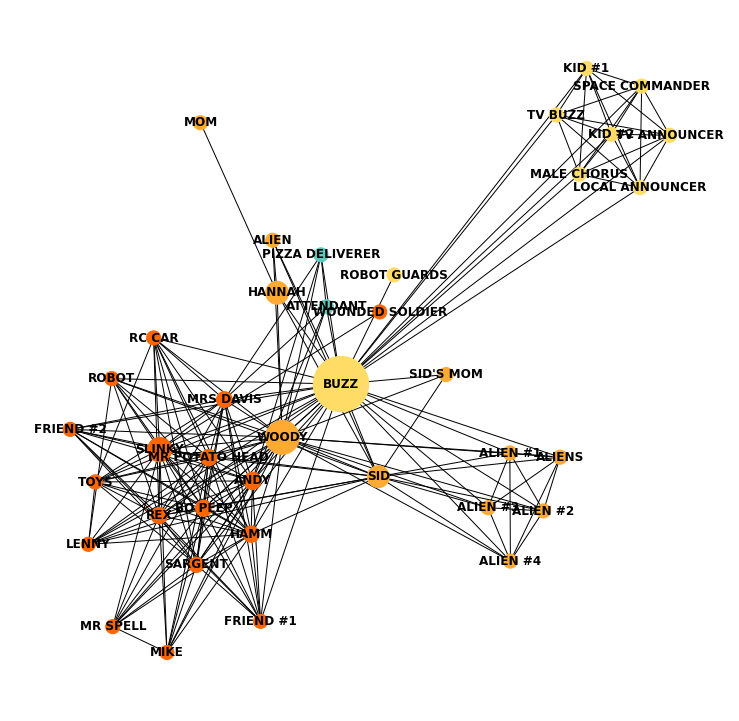

In [97]:
plot_graph(movie)

In [98]:
nx.degree_centrality(movie)['ANDY'],\
nx.clustering(movie)['ANDY'],\
nx.betweenness_centrality(movie)['ANDY'],\
nx.closeness_centrality(movie)['ANDY']

(0.4473684210526315,
 0.7058823529411765,
 0.016216216216216214,
 0.6333333333333333)